# Addition

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `Add`
An n-bit addition gate.

Implements $U|a\rangle|b\rangle \rightarrow |a\rangle|a+b\rangle$ using $4n - 4 T$ gates.

#### Parameters
 - `bitsize`: Number of bits used to represent each integer. Must be large enough to hold the result in the output register of a + b, or else it simply drops the most significant bits. 

#### Registers
 - `a`: A bitsize-sized input register (register a above).
 - `b`: A bitsize-sized input/output register (register b above). 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [2]:
from qualtran.bloqs.arithmetic import Add

### Example Instances

In [3]:
add_small = Add(QUInt(bitsize=4))

In [4]:
add_large = Add(QUInt(bitsize=64))

In [5]:
n = sympy.Symbol('n')
add_symb = Add(QInt(bitsize=n))

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([add_symb, add_small, add_large],
           ['`add_symb`', '`add_small`', '`add_large`'])

### Call Graph

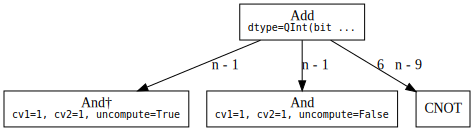

#### Counts totals:
 - `And(cv1=1, cv2=1, uncompute=False)`: $\displaystyle n - 1$
 - `And(cv1=1, cv2=1, uncompute=True)`: $\displaystyle n - 1$
 - `CNOT()`: $\displaystyle 6 n - 9$

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
add_symb_g, add_symb_sigma = add_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(add_symb_g)
show_counts_sigma(add_symb_sigma)

## `OutOfPlaceAdder`
An n-bit addition gate.

Implements $U|a\rangle|b\rangle 0\rangle \rightarrow |a\rangle|b\rangle|a+b\rangle$
using $4n - 4 T$ gates. Uncomputation requires 0 T-gates.

#### Parameters
 - `bitsize`: Number of bits used to represent each input integer. The allocated output register is of size `bitsize+1` so it has enough space to hold the sum of `a+b`. 

#### Registers
 - `a`: A bitsize-sized input register (register a above).
 - `b`: A bitsize-sized input register (register b above).
 - `c`: A bitize+1-sized LEFT/RIGHT register depending on whether the gate adjoint or not. 

#### References
 - [Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648). 


In [8]:
from qualtran.bloqs.arithmetic import OutOfPlaceAdder

### Example Instances

In [9]:
n = sympy.Symbol('n')
add_oop_symb = OutOfPlaceAdder(bitsize=n)

In [10]:
add_oop_small = OutOfPlaceAdder(bitsize=4)

In [11]:
add_oop_large = OutOfPlaceAdder(bitsize=64)

#### Graphical Signature

In [12]:
from qualtran.drawing import show_bloqs
show_bloqs([add_oop_symb, add_oop_small, add_oop_large],
           ['`add_oop_symb`', '`add_oop_small`', '`add_oop_large`'])

### Call Graph

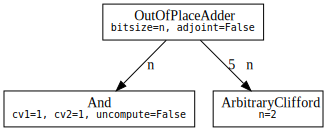

#### Counts totals:
 - `And(cv1=1, cv2=1, uncompute=False)`: $\displaystyle n$
 - `ArbitraryClifford(n=2)`: $\displaystyle 5 n$

In [13]:
from qualtran.resource_counting.generalizers import ignore_split_join
add_oop_symb_g, add_oop_symb_sigma = add_oop_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(add_oop_symb_g)
show_counts_sigma(add_oop_symb_sigma)

## `AddConstantMod`
Applies U(add, M)|x> = |(x + add) % M> if x < M else |x>.

Applies modular addition to input register `|x>` given parameters `mod` and `add_val` s.t.
 1. If integer `x` < `mod`: output is `|(x + add) % M>`
 2. If integer `x` >= `mod`: output is `|x>`.

This condition is needed to ensure that the mapping of all input basis states (i.e. input
states |0>, |1>, ..., |2 ** bitsize - 1) to corresponding output states is bijective and thus
the gate is reversible.

Also supports controlled version of the gate by specifying a per qubit control value as a tuple
of integers passed as `cvs`.

In [14]:
from qualtran.bloqs.arithmetic import AddConstantMod

### Example Instances

In [15]:
n, m, k = sympy.symbols('n m k')
add_k_symb = AddConstantMod(bitsize=n, mod=m, add_val=k)

In [16]:
add_k_small = AddConstantMod(bitsize=4, mod=7, add_val=1)

In [17]:
add_k_large = AddConstantMod(bitsize=64, mod=500, add_val=23)

#### Graphical Signature

In [18]:
from qualtran.drawing import show_bloqs
show_bloqs([add_k_symb, add_k_small, add_k_large],
           ['`add_k_symb`', '`add_k_small`', '`add_k_large`'])

### Call Graph

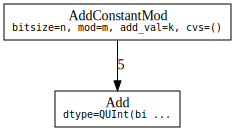

#### Counts totals:
 - `Add(dtype=QUInt(bitsize=n))`: 5

In [19]:
from qualtran.resource_counting.generalizers import ignore_split_join
add_k_symb_g, add_k_symb_sigma = add_k_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(add_k_symb_g)
show_counts_sigma(add_k_symb_sigma)

## `SimpleAddConstant`
Takes |x> to |x + k> for a classical integer `k`.

Applies addition to input register `|x>` given classical integer 'k'.

This is the simple version of constant addition because it involves simply converting the
classical integer into a quantum parameter and using quantum-quantum addition as opposed to
designing a bespoke circuit for constant addition based on the classical parameter.

#### Parameters
 - `bitsize`: Number of bits used to represent each integer.
 - `k`: The classical integer value to be added to x.
 - `cvs`: A tuple of control values. Each entry specifies whether that control line is a "positive" control (`cv[i]=1`) or a "negative" control (`cv[i]=0`).
 - `signed`: A boolean condition which controls whether the x register holds a value represented in 2's Complement or Unsigned. This affects the ability to add a negative constant. 

#### Registers
 - `x`: A bitsize-sized input register (register x above). 

#### References
 - [Improved quantum circuits for elliptic curve discrete logarithms](https://arxiv.org/abs/2001.09580). Fig 2a


In [20]:
from qualtran.bloqs.arithmetic import SimpleAddConstant

### Example Instances

In [21]:
n, k = sympy.symbols('n k')
simple_add_k_symb = SimpleAddConstant(bitsize=n, k=k)

In [22]:
simple_add_k_small = SimpleAddConstant(bitsize=4, k=2, signed=False)

In [23]:
simple_add_k_large = SimpleAddConstant(bitsize=64, k=-23, signed=True)

#### Graphical Signature

In [24]:
from qualtran.drawing import show_bloqs
show_bloqs([simple_add_k_small, simple_add_k_large],
           ['`simple_add_k_small`', '`simple_add_k_large`'])

### Call Graph

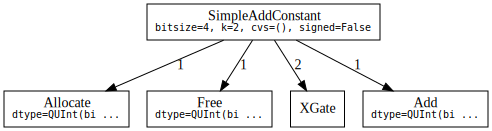

#### Counts totals:
 - `Add(dtype=QUInt(bitsize=4))`: 1
 - `Allocate(dtype=QUInt(bitsize=4))`: 1
 - `Free(dtype=QUInt(bitsize=4))`: 1
 - `XGate()`: 2

In [25]:
from qualtran.resource_counting.generalizers import ignore_split_join
simple_add_k_small_g, simple_add_k_small_sigma = simple_add_k_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(simple_add_k_small_g)
show_counts_sigma(simple_add_k_small_sigma)